In [1]:
from google.colab import files
uploaded = files.upload()


Saving Fish.csv to Fish.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fish_data = pd.read_csv("Fish.csv")


In [3]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
fish_data.shape

(159, 7)

# HISTOGRAM
This univariate histogram tells us that most fish are around 20–30 cm long, and longer fish are relatively rare in this dataset.

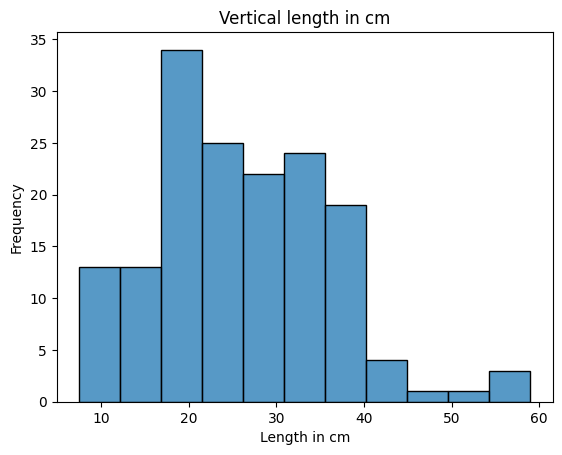

In [12]:
axs = sns.histplot(fish_data["Length1"])
axs.set_title("Vertical length in cm")
axs.set_xlabel("Length in cm")
axs.set_ylabel("Frequency")
plt.show()

# BOXPLOT
Most fish have a height between 5.5 cm and 12.5 cm. This range is called the Interquartile Range (IQR) and it represents the middle 50% of the data.

The median height is about 7.5 cm, which means that half of the fish are shorter than 7.5 cm, and the other half are taller.

The smallest typical height (lower whisker) is around 2 cm, and the maximum typical height (upper whisker) goes up to 18 cm.
No outliers

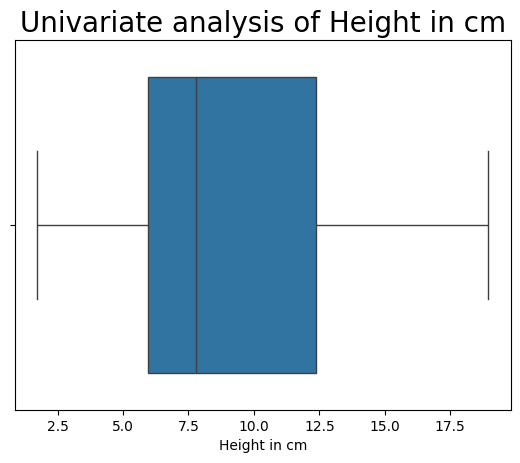

In [34]:
ax = sns.boxplot(data = fish_data,x=fish_data['Height'])
ax.set_title("Univariate analysis of Height in cm",fontsize=20)
ax.set_xlabel("Height in cm")
ax.set_ylabel("")
plt.show()

# Violinplot
Similar to Boxplot just more preicse and easy to visualize
This violin plot shows that most fish are around 6 to 12 cm tall, with a typical (median) height near 7.5 cm. Very short or very tall fish are less common, which is why the ends are narrower. The middle is thick — that’s where most of the fish heights fall.

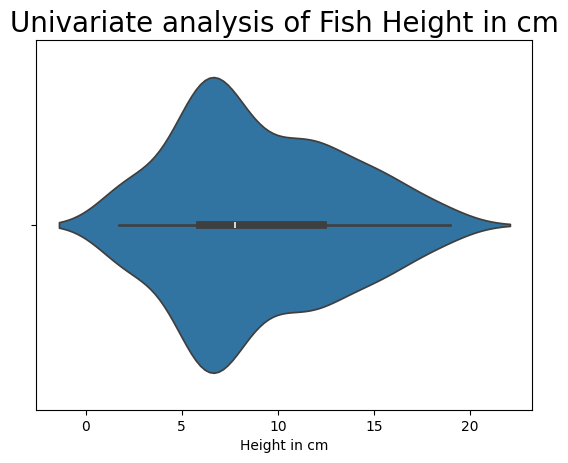

In [33]:
ax=sns.violinplot(data=fish_data ,x=fish_data['Height'])
ax.set_title("Univariate analysis of Fish Height in cm",fontsize=20)
ax.set_xlabel("Height in cm")
ax.set_ylabel("")
plt.show()

# Create a Summary Table using the describe method in Pandas

In [26]:
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# General Info about data set
This dataset gives detailed measurements of different types of fish. Most fish weigh between 120–650 grams, are 25–40 cm long, about 6–12 cm tall, and 4–5 cm wide. There are no missing values, and everything is nicely recorded. You can use this data to compare fish species, build predictions (like price based on size), or just understand how fish sizes vary.

In [29]:
print("Shape:", fish_data.shape)
print("\nColumn Names:\n\n", fish_data.columns)
print("\nMissing Values:\n\n", fish_data.isnull().sum())
print("\nData Types & Non-Null Info: \n\n")
fish_data.info()
print("\nStatistical Summary:\n\n", fish_data.describe())


Shape: (159, 7)

Column Names:

 Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Missing Values:

 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Data Types & Non-Null Info: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB

Statistical Summary:

             Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   2

# BAR CHART
It shows how many times each fish lies in the data set — like Parkki is 10, most found species is Perch, and least found is Whitefish (almost 5).


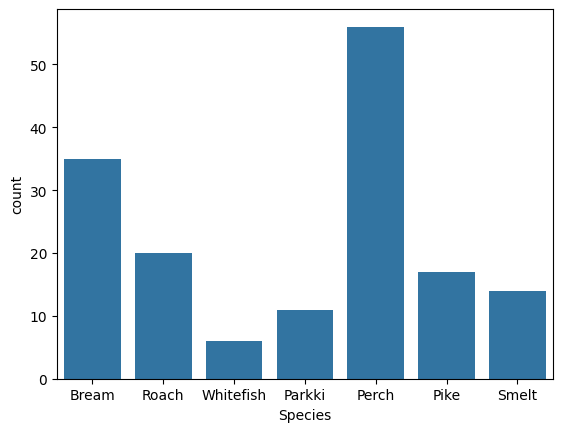

In [32]:
ax=sns.countplot(x='Species', data=fish_data)


# PIE CHART(matplotlip)

In [40]:
group=fish_data.groupby('Species').count()
print(group)

           Weight  Length1  Length2  Length3  Height  Width
Species                                                    
Bream          35       35       35       35      35     35
Parkki         11       11       11       11      11     11
Perch          56       56       56       56      56     56
Pike           17       17       17       17      17     17
Roach          20       20       20       20      20     20
Smelt          14       14       14       14      14     14
Whitefish       6        6        6        6       6      6


This grouped the dataset by the 'Species' column and counted the non-null entries in each numeric column (like Weight, Length, etc.) for every species. However, it displayed a full table with counts repeated across all columns, which was not the desired simplified format

In [41]:
group = fish_data.groupby('Species').size().reset_index(name='Count')
print(group)


     Species  Count
0      Bream     35
1     Parkki     11
2      Perch     56
3       Pike     17
4      Roach     20
5      Smelt     14
6  Whitefish      6


### This output shows how many times each fish species appears in the dataset — making it easier to analyze the distribution of fish types.

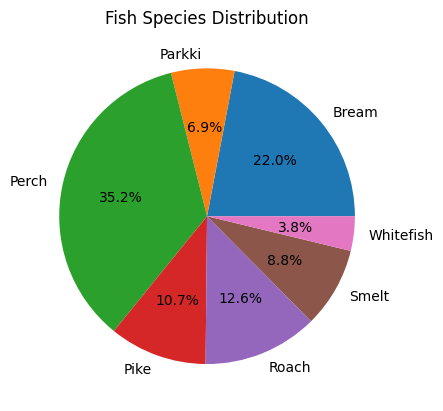

In [42]:
plt.pie(group['Count'], labels=group['Species'], autopct='%1.1f%%')
plt.title('Fish Species Distribution')
plt.show()

I created a pie chart using the group data, which shows the number of fish samples for each species in our dataset.

Each slice of the pie represents a different species of fish (like Bream, Perch, Pike, etc.), and the size of the slice shows how many times that fish appears in the data.